### Introduction

In this blog, we are exploring the [Retail Dataset on Kaggle](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?resource=download). The dataset was originally used for Pentaho DI Kettle but represents a rich enough sample to practice data analysis on. This task is submitted as part of the [HNG internship](https://hng.tech/internship). It is an interesting challenge for techies to take up in data analysis, backend, frontend, design and several other tracks. The people that make it out are top notch talent and those looking to hire should head over to the [website](https://hng.tech/hire).


Below, we are going to read the file and have a quick view of the columns and datatypes. The dataset has 25 columns with 2823 rows.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("sales_data.csv", encoding='latin-1')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05/07/2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07/01/2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [35]:
df.shape

(2823, 25)

Here are the different data types present.

In [12]:
df.dtypes


ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Next, we will look for empty cells in each column. The empty cells do not seem to be that impactful although they'd be useful in further analysis. In TERRITORY, the 1074 were for North America which was misinterpreted as Not A Number. The STATE column should be dropped if doing an analysis of all the orders. It'd only be useful for analysis of sales in the US.

In [13]:
# Find empty cells
empty_cells = df.isnull().sum()

# Number of empty cells in each column
print(empty_cells)


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


This gives all the info together.

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


We will also check basic statistics for the numerical columns. Note, all numerical columns are picked and the formula does not discriminate IDs. Converting IDs to categorical columns to avoid numerical manipulation could be useful.

In [22]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


## Observations

In the next part, we look for anomalies like duplicate rows, financial columns being in the negative, or quantities ordered being greater than 100.

In [17]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Check for outliers in the quantity column
outliers = df[df['QUANTITYORDERED'] > 100]

# Check for negative values in a few price columns
negative_prices = df[df['PRICEEACH'] < 0]
negative_prices2 = df[df['SALES'] < 0]

# Print the number of anomalies found
print("Number of duplicate rows:", len(duplicate_rows))
print("Number of outliers in quantity:", len(outliers))
print("Number of negative values in unit price:", len(negative_prices))
print("Number of negative values in Sales:", len(negative_prices))

Number of duplicate rows: 0
Number of outliers in quantity: 0
Number of negative values in unit price: 0
Number of negative values in Sales: 0


There were no anomalies in the dataset.

In terms of frequency, the deals are mostly medium with the average sale being 3553.

<Axes: xlabel='DEALSIZE'>

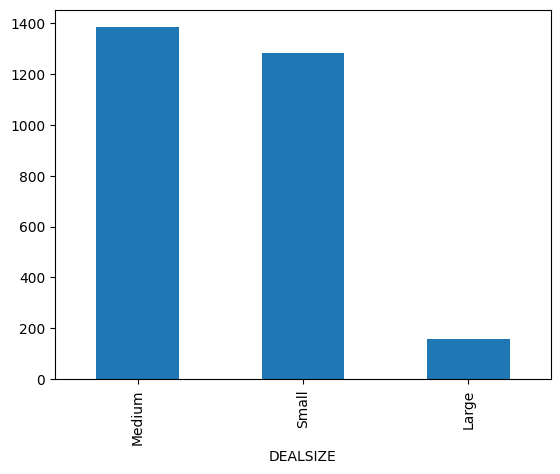

In [21]:
df['DEALSIZE'].value_counts().plot(kind='bar')

Mean sales for each product line can be seen in the graph below. The average difference between Trains (lowest) and Classic Cars (Highest), seems to be a 1000.

<Axes: xlabel='PRODUCTLINE'>

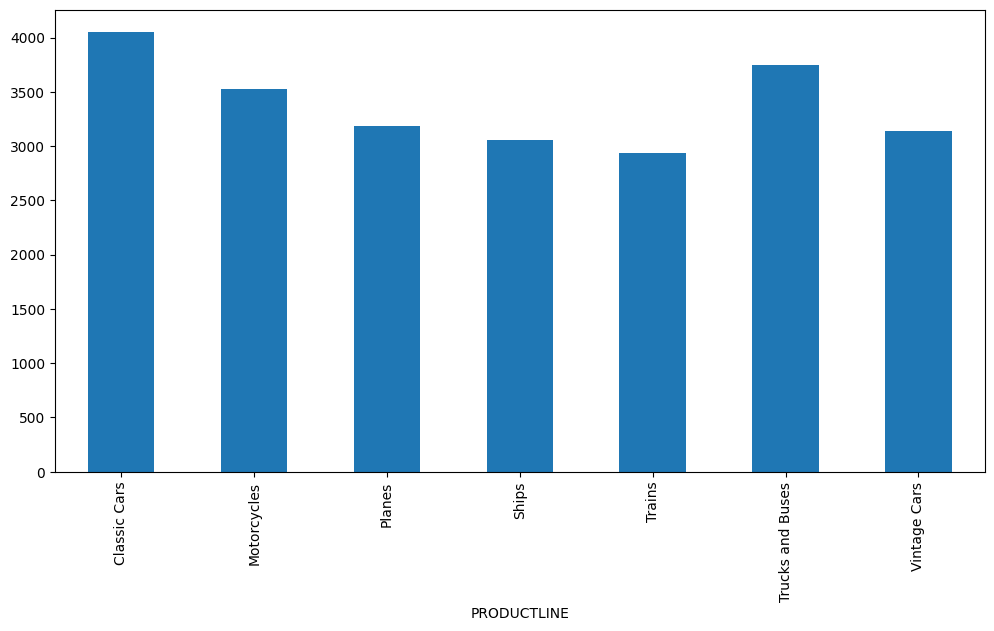

In [29]:
plt.figure(figsize=(12, 6))
df.groupby('PRODUCTLINE')['SALES'].mean().plot(kind='bar')

There was a sales increase between 2003 and 2004 then a dip in 2005.

In [31]:
df['YEAR_ID'].value_counts()

YEAR_ID
2004    1345
2003    1000
2005     478
Name: count, dtype: int64

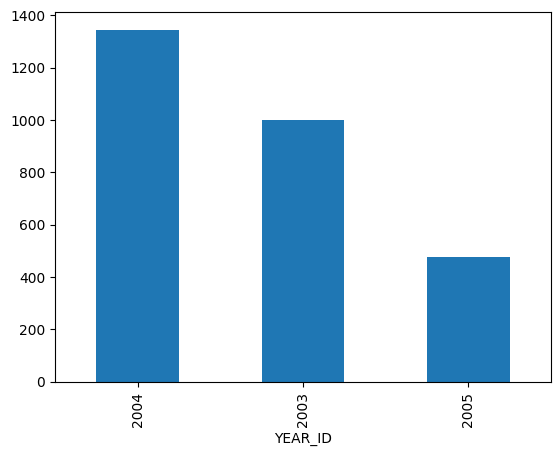

In [30]:
df['YEAR_ID'].value_counts().plot(kind='bar')
plt.show()


## Conclusion

Further analysis could help us find out why the cells were empty for STATE and TERRITORY and if the information can be found in other ways. This also helps the team ensure integrity in data entry is adhered to during data collection in other projects.

An investigation should also be done to evaluate any reasons behind the deep in 2005. Was the data collected throughout the year? Was there a financial crisis? Is it something in the supply chain? These would be some appropriate questions to ask.

I'd also reccomend analysis that touches on correlation between the different columns.